<a href="https://colab.research.google.com/github/AsmaBenHmidene/anti-HIV-molecules-activity-and-lipophilicity-predictions/blob/main/anti_HIV_Active_Molecule__activity_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research problem and Objective:

Identification of new molecules promising for treatment of HIV-infection and HIV-associated disorders remains an important task in order to provide safer and more effective therapies. Utilization of prior knowledge by application of computer-aided drug discovery approaches reduces time and financial expenses and increases the chances of positive results in anti-HIV R&D.

To provide the scientific community with a tool that allows estimating of potential agents for treatment of HIV-infection and its comorbidities, we tried different models for prediction of molecules' biological activities based on the structural formulae of drug-like molecules.

We also tried to work on the amelioration of the selected best model performance using different techniques to treat data disbalance.



# Description:


---


"The HIV dataset was introduced by the Drug Therapeutics Program (DTP) AIDS Antiviral Screen, which tested the ability to inhibit HIV replication for over 40,000 compounds.

Screening results were evaluated and placed into three categories:
- confirmed inactive (CI),
- confirmed active (CA)
- confirmed moderately active (CM).

We further combine the latter two labels, making it a classification task between inactive (CI) and active (CA and CM)".

# 1) study of the activity:

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Projects/mlchem project/HIV.csv', low_memory=False)
print(df.shape)
df.head()

(41127, 3)


,smiles,activity,HIV_active
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41127 entries, 0 to 41126
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   smiles      41127 non-null  object
 1   activity    41127 non-null  object
 2   HIV_active  41127 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 964.0+ KB


There is no NaN values.

In [5]:
df['activity'].value_counts()

CI    39684
CM     1039
CA      404
Name: activity, dtype: int64

In [6]:
df['HIV_active'].value_counts()

0    39684
1     1443
Name: HIV_active, dtype: int64

smiles: representation of the molecular structure

activity: Three-class labels for screening results: CI/CM/CA

"HIV_active": Binary labels for screening results: 1 (CA/CM) and 0 (CI)

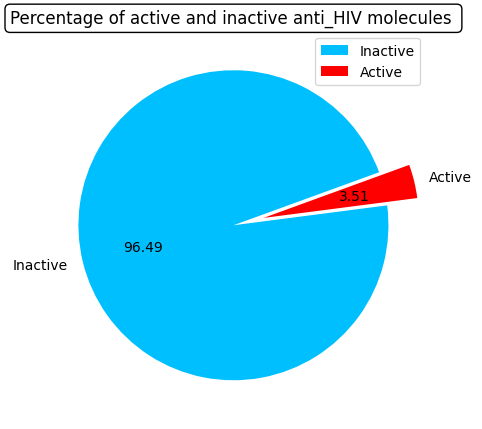

In [7]:
plt.figure(figsize=(5,8))
plt.pie(x=df.HIV_active.value_counts(),
        labels=['Inactive','Active'],
        startangle = 20,
        colors=['deepskyblue','red'],
        autopct='%.2f',
        explode=[0,0.2]
       );
plt.legend();
plt.title("Percentage of active and inactive anti_HIV molecules ", bbox={'facecolor':'none', 'edgecolor':'black', 'boxstyle':'round', 'pad': 0.3})
plt.show();

We notice great class disbalance: Active substances represent only 3.5%.

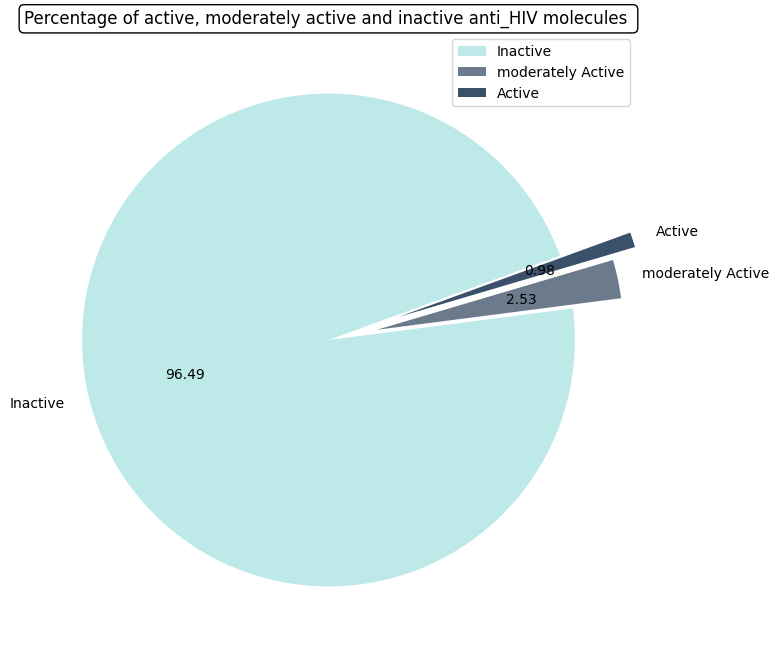

In [8]:
plt.figure(figsize=(8,8))
plt.pie(x=df['activity'].value_counts(),
        labels=['Inactive','moderately Active', 'Active'],
        startangle = 20,
        colors=["#BEE9E9","#6C7B8B", "#3A506B"],
        autopct='%.2f',
        explode=[0,0.2,0.3]
       );
plt.legend();
plt.title("Percentage of active, moderately active and inactive anti_HIV molecules ", bbox={'facecolor':'none', 'edgecolor':'black', 'boxstyle':'round', 'pad': 0.3})
plt.show();

Furthermore, the percentage of moderately active molecule is higher than the active one.

# 2) Molecular structure of some of the active molecules:

In [9]:
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 45.9 MB/s eta 0:00:00


In [10]:
from rdkit import Chem
from rdkit.Chem import AllChem, PandasTools, Descriptors

In [11]:
PandasTools.AddMoleculeColumnToFrame(df,'smiles')
print(df.shape)
print(df.isnull().sum())
df.head()

(41127, 4)
smiles        0
activity      0
HIV_active    0
ROMol         0
dtype: int64


[20:15:46] WARNING: not removing hydrogen atom without neighbors
[20:15:46] WARNING: not removing hydrogen atom without neighbors


,smiles,activity,HIV_active,ROMol
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0,<rdkit.Chem.rdchem.Mol object at 0x7caac6d30430>
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0,<rdkit.Chem.rdchem.Mol object at 0x7caac6d304a0>
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0,<rdkit.Chem.rdchem.Mol object at 0x7caac6d30510>
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0,<rdkit.Chem.rdchem.Mol object at 0x7caac6d30580>
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0,<rdkit.Chem.rdchem.Mol object at 0x7caac6d305f0>


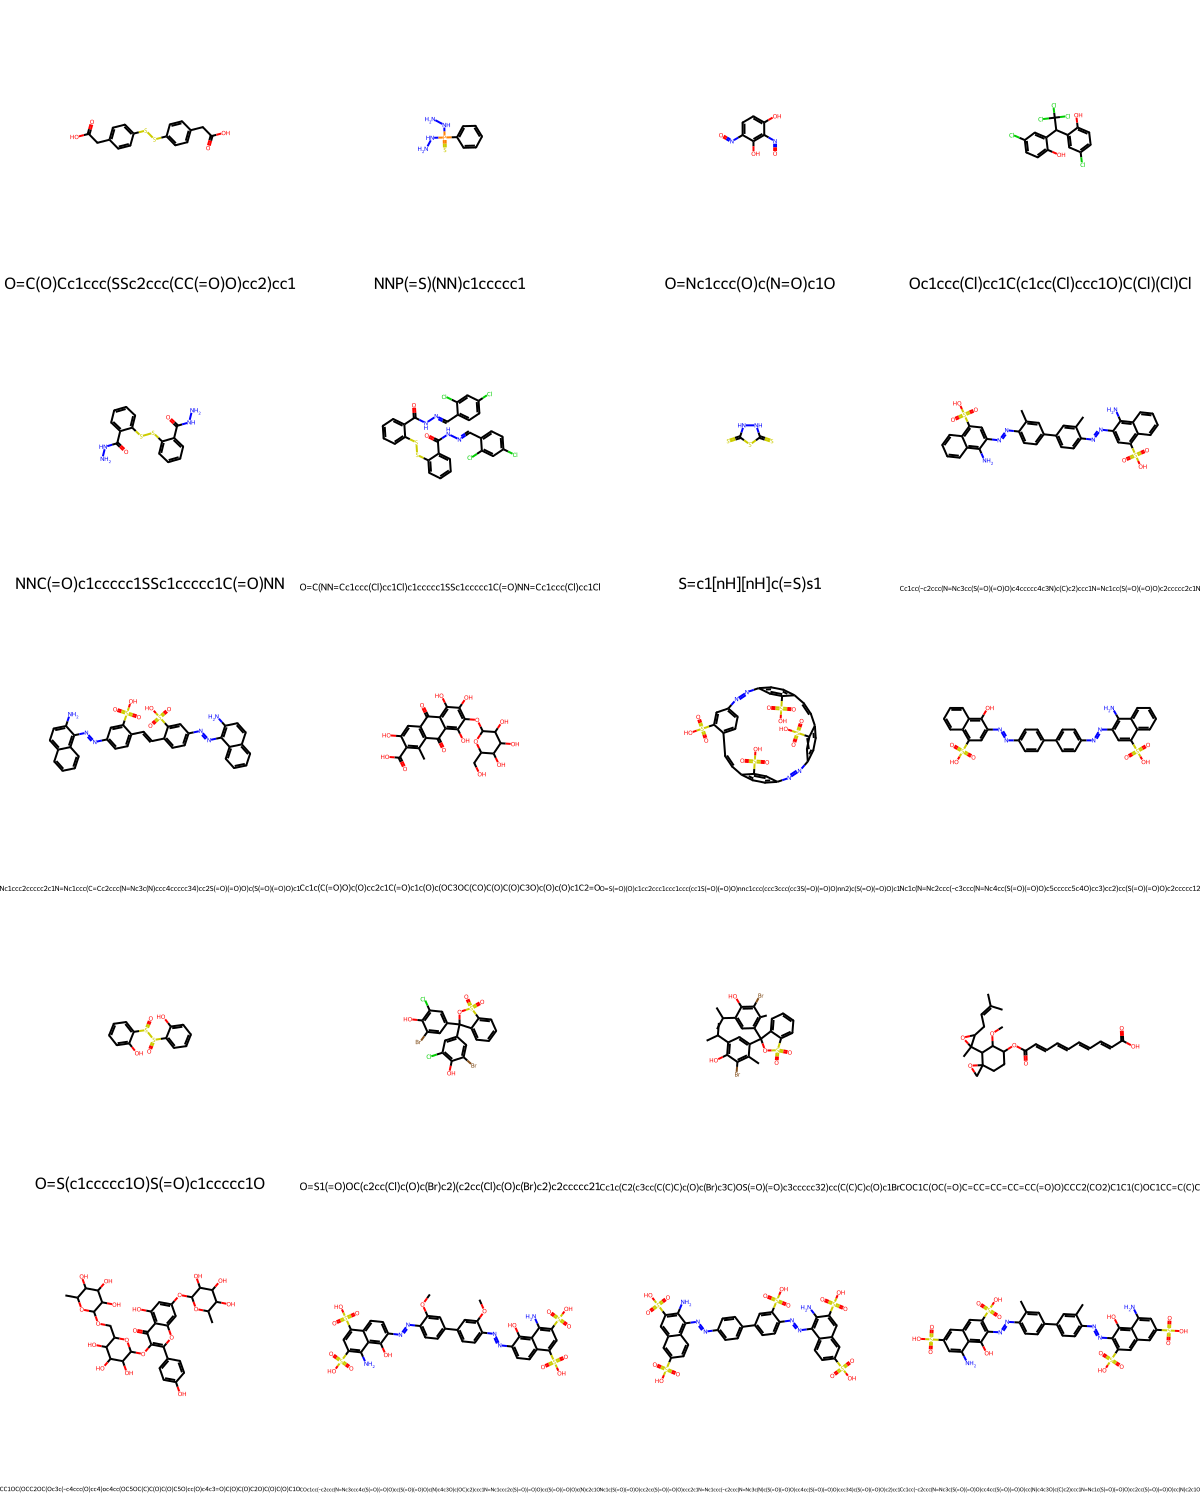

In [12]:
df_active = df[df['HIV_active']==1]
df_active_structure = PandasTools.FrameToGridImage(df_active[:20], column='ROMol', legendsCol='smiles',
                                               molsPerRow=4, subImgSize=(300,300))
df_active_structure

# 3) Model prediction of the activity:

We will add to the dataframe more features including detailed description of each molecule structure using rdkit.

rdkit.Chem.Descriptors provides a number of general molecular descriptors that can also be used to featurize a molecule. Most of the descriptors are straightforward to use from Python.

In [13]:
for i,j in Descriptors.descList:
    df[i] = df['ROMol'].map(j)

[20:19:15] WARNING: not removing hydrogen atom without neighbors
[20:19:15] WARNING: not removing hydrogen atom without neighbors
[20:20:47] WARNING: not removing hydrogen atom without neighbors
[20:20:47] WARNING: not removing hydrogen atom without neighbors
[20:20:54] WARNING: not removing hydrogen atom without neighbors
[20:20:54] WARNING: not removing hydrogen atom without neighbors
[20:20:55] WARNING: not removing hydrogen atom without neighbors
[20:20:55] WARNING: not removing hydrogen atom without neighbors
[20:20:55] WARNING: not removing hydrogen atom without neighbors
[20:20:55] WARNING: not removing hydrogen atom without neighbors
[20:20:56] WARNING: not removing hydrogen atom without neighbors
[20:20:56] WARNING: not removing hydrogen atom without neighbors
[20:20:57] WARNING: not removing hydrogen atom without neighbors
[20:20:57] WARNING: not removing hydrogen atom without neighbors
[20:20:58] WARNING: not removing hydrogen atom without neighbors
[20:20:58] WARNING: not r

In [14]:
print(df.shape)
df.head()

(41127, 212)


,smiles,activity,HIV_active,ROMol,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0,<rdkit.Chem.rdchem.Mol object at 0x7caac6d30430>,5.925903,-2.330012,5.925903,0.759994,0.434358,319.888,...,0,0,0,0,0,0,0,0,0,0
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0,<rdkit.Chem.rdchem.Mol object at 0x7caac6d304a0>,6.515117,-2.879653,6.515117,0.475558,0.104103,564.140,...,0,0,0,0,0,0,0,0,0,0
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0,<rdkit.Chem.rdchem.Mol object at 0x7caac6d30510>,12.177015,0.041001,12.177015,0.041001,0.581359,291.375,...,0,0,0,0,0,0,0,0,0,0
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0,<rdkit.Chem.rdchem.Mol object at 0x7caac6d30580>,11.401803,-4.524487,11.401803,0.087790,0.357615,370.408,...,0,0,0,0,0,0,0,0,0,0
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0,<rdkit.Chem.rdchem.Mol object at 0x7caac6d305f0>,9.857917,-4.296481,9.857917,0.980324,0.538723,190.198,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41127 entries, 0 to 41126
Columns: 212 entries, smiles to fr_urea
dtypes: float64(104), int64(105), object(3)
memory usage: 66.5+ MB


In [16]:
df.isna().sum().sum()

19368

In [17]:
df = df.dropna(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41127 entries, 0 to 41126
Columns: 200 entries, smiles to fr_urea
dtypes: float64(92), int64(105), object(3)
memory usage: 62.8+ MB


In [18]:
#Identify the features (X) and target (y)
y = df['HIV_active']
X = df.drop(columns=['HIV_active','smiles','activity','ROMol'])

In [19]:
#Features selection
corr_rate_threshold = 0.95

cor_matrix = X.corr().abs()

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= corr_rate_threshold)]
X_selected_features = X.drop(X[to_drop], axis = 1)
X_selected_features.shape

(41127, 166)

In [20]:
#train/test split
from sklearn.model_selection import train_test_split, KFold

kf = KFold(n_splits = 5, shuffle = True, random_state=2305)

for tr_idx, te_idx in kf.split(X_selected_features):
    X_train, X_test = X_selected_features.iloc[tr_idx], X_selected_features.iloc[te_idx]
    y_train, y_test = y.iloc[tr_idx], y.iloc[te_idx]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32902, 166), (8225, 166), (32902,), (8225,))

In [21]:
#models prediction:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [22]:
scaler = StandardScaler()
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.fit_transform(X_test)

In [23]:
%%time
xgb = XGBClassifier()
xgb_pipe = make_pipeline(xgb)
xgb_pipe.fit(X_trainScaled, y_train)

CPU times: user 5.8 s, sys: 59.6 ms, total: 5.86 s
Wall time: 3.76 s


Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [24]:
%%time
lgbm = LGBMClassifier()
lgbm_pipe = make_pipeline(lgbm)
lgbm_pipe.fit(X_trainScaled, y_train)

[LightGBM] [Info] Number of positive: 1127, number of negative: 31775
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17727
[LightGBM] [Info] Number of data points in the train set: 32902, number of used features: 158
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034253 -> initscore=-3.339121
[LightGBM] [Info] Start training from score -3.339121
CPU times: user 2.92 s, sys: 78.8 ms, total: 3 s
Wall time: 3.01 s


Pipeline(steps=[('lgbmclassifier', LGBMClassifier())])

In [25]:
# XGBoost
xgb_predict = xgb_pipe.predict(X_testScaled)
print('XGB Classification Report')
print(classification_report(y_test, xgb_predict))
print('-'*80)

# LightGBM
lgbm_predict = lgbm_pipe.predict(X_testScaled)
print('LightGBM Classification Report:\n', classification_report(y_test, lgbm_predict))
print('-'*80)

XGB Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7909
           1       0.80      0.19      0.31       316

    accuracy                           0.97      8225
   macro avg       0.88      0.59      0.65      8225
weighted avg       0.96      0.97      0.96      8225

--------------------------------------------------------------------------------
LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7909
           1       0.80      0.24      0.37       316

    accuracy                           0.97      8225
   macro avg       0.89      0.62      0.68      8225
weighted avg       0.96      0.97      0.96      8225

--------------------------------------------------------------------------------


In [26]:
from sklearn.metrics import confusion_matrix

predictions = [xgb_predict, lgbm_predict]
con_matrices = []

for i in range(len(predictions)):
  con_matrices.append(confusion_matrix(y_test, predictions[i]))

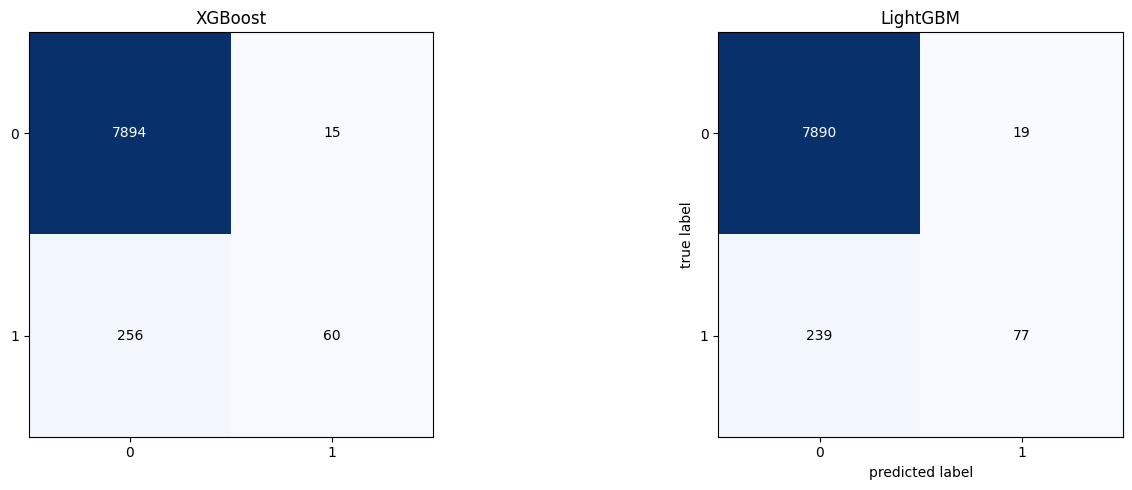

In [27]:
from mlxtend.plotting import plot_confusion_matrix

titles =['XGBoost', 'LightGBM']
fig, axs = plt.subplots(1, len(titles), figsize=(15, 5))

for i, ax in enumerate(axs):
    plot_confusion_matrix(con_matrices[i], axis=ax)
    ax.set_title(titles[i])

plt.tight_layout()
plt.show()

In [28]:
from sklearn.metrics import auc, roc_curve
def evaluation_class(model, X_test, y_test):
    prediction = model.predict_proba(X_test)
    preds = model.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    plt.title('ROC Curve')
    plt.plot(fpr, tpr, 'g', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    print('ROC AUC score:', round(roc_auc, 4))

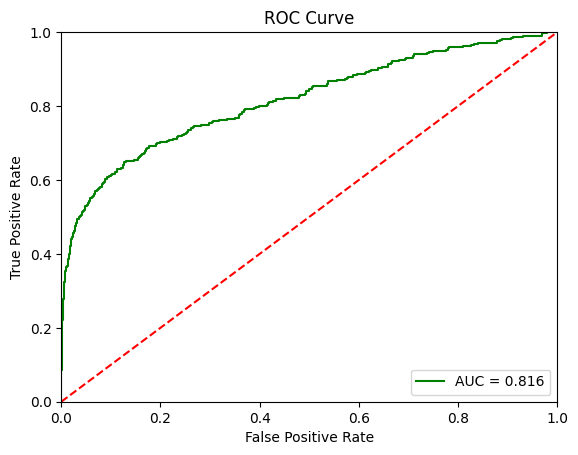

ROC AUC score: 0.8161


In [29]:
evaluation_class(xgb, X_testScaled, y_test)

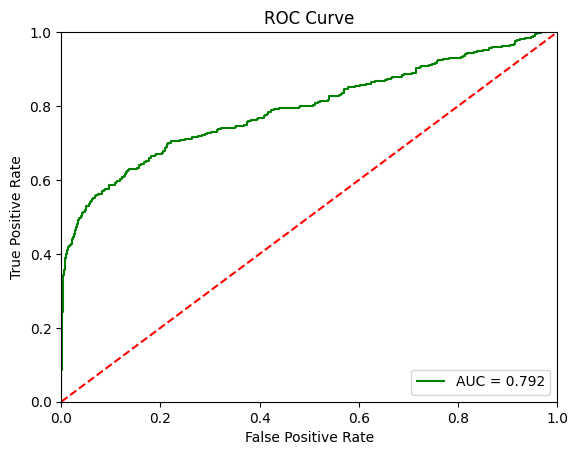

ROC AUC score: 0.792


In [30]:
evaluation_class(lgbm, X_testScaled, y_test)

The recall of the minority class is very low. It proves that the model is more biased towards majority class. So, we will apply different imbalanced data handling techniques and see their accuracy and recall results.

# 4)Classes disbalance:

### 1) Random UnderSampling:

In this phase of the project we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

Steps:
- The first thing we have to do is determine how imbalanced is our class (use "value_counts()" on the class column to determine the amount for each label)
- Once we determine how many molecule are considered active (active = "1") , we should bring the inactive to the same amount as active molecules (assuming we want a 50/50 ratio), this will be equivalent to  1443 active molecules and  1443 inactive ones.
After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes.
- Then the next step we will implement is to shuffle the data to see if our models can maintain a certain balance everytime we run this script.

Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss

In [31]:
df['HIV_active'].value_counts()

0    39684
1     1443
Name: HIV_active, dtype: int64

In [32]:
X = df.drop(columns=['HIV_active','smiles','activity','ROMol'], axis=1)
y = df['HIV_active']

In [33]:
#Features selection
corr_rate_threshold = 0.95

cor_matrix = X.corr().abs()

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= corr_rate_threshold)]
X_selected_features = X.drop(X[to_drop], axis = 1)
X_selected_features.shape

(41127, 166)

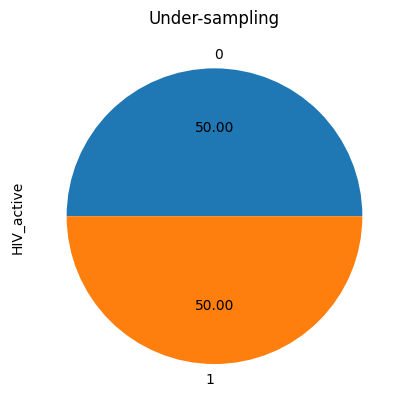

In [34]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X_selected_features, y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [35]:
y_res.value_counts()

0    1443
1    1443
Name: HIV_active, dtype: int64

In [36]:
#  split our training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [37]:
scaler = StandardScaler()
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.fit_transform(X_test)

In [38]:
%%time
xgb = XGBClassifier()
xgb_pipe = make_pipeline(xgb)
xgb_pipe.fit(X_trainScaled, y_train)

CPU times: user 3.57 s, sys: 15.1 ms, total: 3.58 s
Wall time: 2.71 s


Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [39]:
xgb_predict = xgb_pipe.predict(X_testScaled)
print('XGB Classification Report')
print(classification_report(y_test, xgb_predict))

XGB Classification Report
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       300
           1       0.75      0.67      0.71       278

    accuracy                           0.73       578
   macro avg       0.73      0.73      0.73       578
weighted avg       0.73      0.73      0.73       578



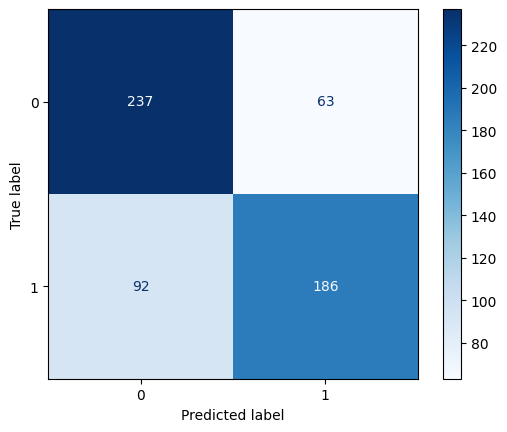

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(xgb, X_testScaled, y_test, cmap = 'Blues');

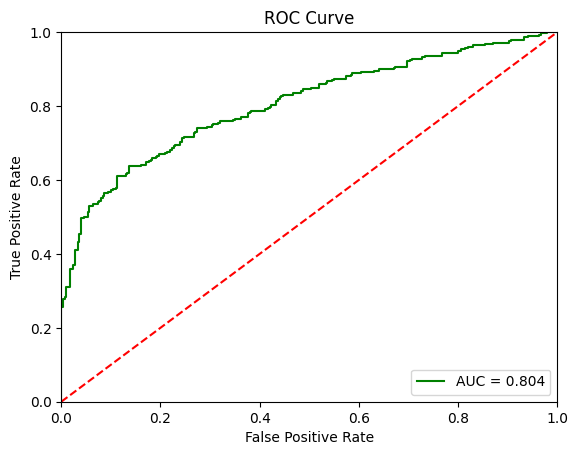

ROC AUC score: 0.8043


In [41]:
evaluation_class(xgb, X_testScaled, y_test)

In [42]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
# define pipeline
steps = [('under',RandomUnderSampler()), ('model', XGBClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_trainScaled, y_train, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.734


### 2) Random oversampling:

 We will implement "Random Over Sampling" which basically consists of adding data in order to have a more balanced dataset and thus avoiding our models to overfitting.

 We will follow the same steps as in undersampling.

In [43]:
X = df.drop(columns=['HIV_active','smiles','activity','ROMol'], axis=1)
y = df['HIV_active']

In [44]:
#Features selection
corr_rate_threshold = 0.95

cor_matrix = X.corr().abs()

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= corr_rate_threshold)]
X_selected_features = X.drop(X[to_drop], axis = 1)
X_selected_features.shape

(41127, 166)

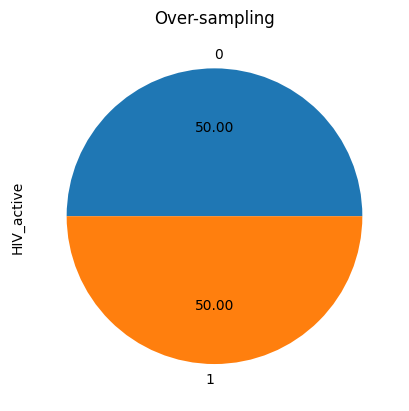

In [45]:
from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res_ovr, y_res_ovr = ros.fit_resample(X_selected_features, y)
ax = y_res_ovr.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [46]:
y_res_ovr.value_counts()

0    39684
1    39684
Name: HIV_active, dtype: int64

In [47]:
#  split our training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res_ovr, y_res_ovr, test_size=0.2, random_state=42)

In [48]:
scaler = StandardScaler()
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.fit_transform(X_test)

In [49]:
%%time
xgb = XGBClassifier()
xgb_pipe = make_pipeline(xgb)
xgb_pipe.fit(X_trainScaled, y_train)

CPU times: user 12 s, sys: 69.8 ms, total: 12 s
Wall time: 8.09 s


Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [50]:
xgb_predict = xgb_pipe.predict(X_testScaled)
print('XGB Classification Report')
print(classification_report(y_test, xgb_predict))

XGB Classification Report
              precision    recall  f1-score   support

           0       0.75      0.99      0.85      7931
           1       0.98      0.67      0.79      7943

    accuracy                           0.83     15874
   macro avg       0.87      0.83      0.82     15874
weighted avg       0.87      0.83      0.82     15874



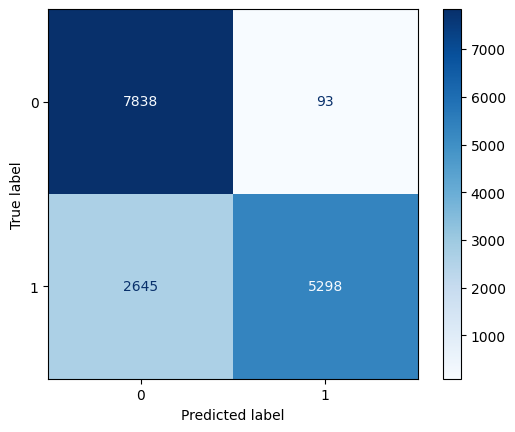

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(xgb, X_testScaled, y_test, cmap = 'Blues');

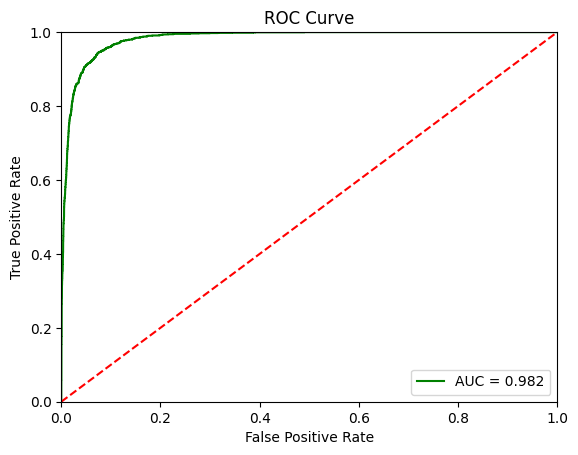

ROC AUC score: 0.9821


In [52]:
evaluation_class(xgb, X_testScaled, y_test)

In [53]:
# define pipeline
steps = [('under',RandomOverSampler()), ('model', XGBClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_trainScaled, y_train, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.988


### 3) SMOTE:

SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [54]:
#Identify the features (X) and target (y)
y = df['HIV_active']
X = df.drop(columns=['HIV_active','smiles','activity','ROMol'])

In [55]:
#Features selection
corr_rate_threshold = 0.95

cor_matrix = X.corr().abs()

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= corr_rate_threshold)]
X_selected_features = X.drop(X[to_drop], axis = 1)
X_selected_features.shape

(41127, 166)

In [56]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, test_size=0.2, random_state=1)

In [57]:
# Apply SMOTE to the training set
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [58]:
X_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63530 entries, 0 to 63529
Columns: 166 entries, MaxEStateIndex to fr_urea
dtypes: float64(73), int64(93)
memory usage: 80.5 MB


In [59]:
y_train_resampled.value_counts()

0    31765
1    31765
Name: HIV_active, dtype: int64

In [60]:
scaler = StandardScaler()
X_trainScaled = scaler.fit_transform(X_train_resampled)
X_testScaled = scaler.fit_transform(X_test)

In [61]:
model = XGBClassifier()
model.fit(X_trainScaled , y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [62]:
# Evaluate the performance of the trained model on the testing set
y_pred = model.predict(X_testScaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      7919
           1       0.04      1.00      0.07       307

    accuracy                           0.04      8226
   macro avg       0.52      0.50      0.04      8226
weighted avg       0.96      0.04      0.00      8226



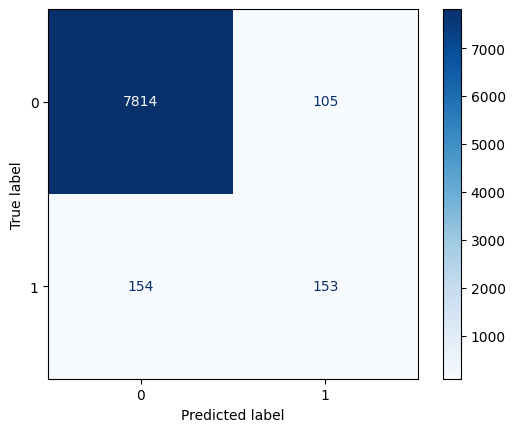

In [63]:
ConfusionMatrixDisplay.from_estimator(xgb, X_testScaled, y_test, cmap = 'Blues');

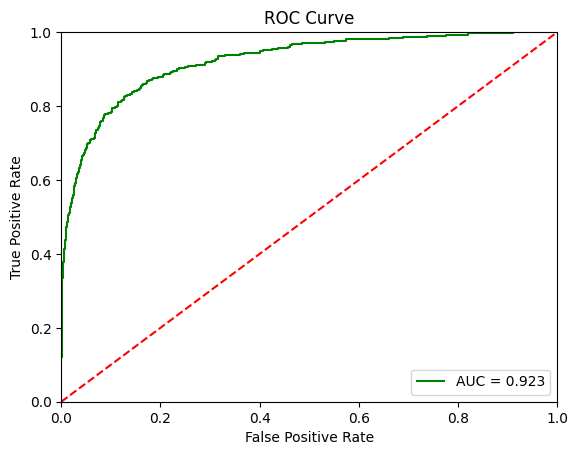

ROC AUC score: 0.9226


In [64]:
evaluation_class(xgb, X_testScaled, y_test)

In [65]:
# define pipeline
steps = [('over',SMOTE()), ('model', XGBClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_trainScaled, y_train_resampled, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.987
